In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import PIL #pillow import
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
X_train[0].shape

(32, 32, 3)

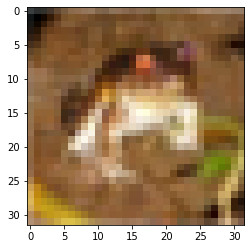

In [6]:
plt.imshow(X_train[0])

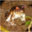

In [7]:
PIL.Image.fromarray(X_train[0])

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train_new = to_categorical(y_train, 10)  #one hot encoding of output

In [12]:
y_test_new = to_categorical(y_test, 10)

##create models

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()

#cnn layers -> 1
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#conv layer-> 2
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
model.fit(X_train, y_train_new, validation_data=(X_test, y_test_new), epochs=25, callbacks=[early_stop])

Epoch 1/25
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4831 - accuracy: 0.4667 - val_loss: 1.2917 - val_accuracy: 0.5404
Epoch 2/25
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1585 - accuracy: 0.5920 - val_loss: 1.2252 - val_accuracy: 0.5789
Epoch 3/25
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9956 - accuracy: 0.6528 - val_loss: 1.0706 - val_accuracy: 0.6296
Epoch 4/25
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8804 - accuracy: 0.6945 - val_loss: 0.9924 - val_accuracy: 0.6589
Epoch 5/25
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7906 - accuracy: 0.7219 - val_loss: 0.9354 - val_accuracy: 0.6782
Epoch 6/25
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7100 - accuracy: 0.7521 - val_loss: 0.9397 - val_accuracy: 0.6863
Epoch 7/25
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6312 - accuracy: 0.7780 - val_loss: 0.9846 -

In [19]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.483126,0.46666,1.291709,0.5404
1,1.158489,0.59202,1.225196,0.5789
2,0.995601,0.65280,1.070575,0.6296
3,0.880369,0.69450,0.992379,0.6589
4,0.790567,0.72188,0.935372,0.6782
5,0.709993,0.75214,0.939710,0.6863
6,0.631230,0.77798,0.984570,0.6806
7,0.562513,0.80376,1.010730,0.6841
8,0.496092,0.82478,1.088550,0.6704
9,0.434404,0.84608,1.133692,0.6791


In [21]:
# losses = metrics[['loss', 'val_loss']]
# # plt.figure(figsize=(10,8))
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.plot(metrics[['loss']], label='training_loss')
# plt.plot(metrics[['val_loss']], label='validation loss')
# plt.legend(['loss','val_loss'], loc='upper right')
# plt.show()

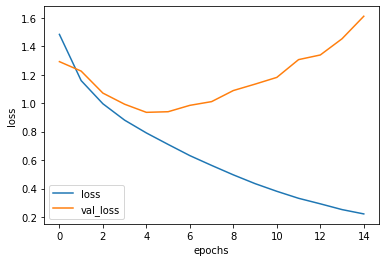

In [22]:
losses = metrics[['loss', 'val_loss']]
ax = losses.plot()
ax.set_xlabel('epochs')
ax.set_ylabel('loss');

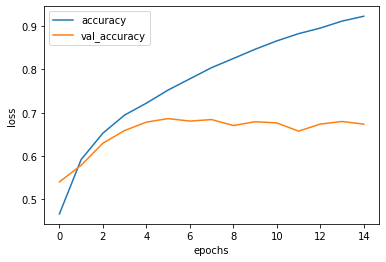

In [23]:
accuracies = metrics[['accuracy', 'val_accuracy']]
ax = accuracies.plot()
ax.set_xlabel('epochs')
ax.set_ylabel('loss');

In [24]:
##validation set evaluation
model.evaluate(X_test, y_test_new)

313/313 [==============================] - 3s 8ms/step - loss: 1.6107 - accuracy: 0.6735


[1.6106747388839722, 0.6735000014305115]

In [25]:
model.metrics_names

['loss', 'accuracy']

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
y_pred = model.predict_classes(X_test)
# y_pred = np.argmax(model.predict(X_test), axis=-1) ##same as above

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.81      0.79      0.80      1000
           2       0.56      0.59      0.57      1000
           3       0.52      0.45      0.48      1000
           4       0.67      0.59      0.63      1000
           5       0.54      0.62      0.58      1000
           6       0.71      0.80      0.75      1000
           7       0.74      0.68      0.71      1000
           8       0.84      0.68      0.75      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [29]:
print(confusion_matrix(y_test, y_pred))

[[751  23  71  13  11  12  10  16  43  50]
 [ 33 788   9   9   4   9  20   6  18 104]
 [ 61   9 589  49  72  81  83  36   8  12]
 [ 28   3  83 453  65 211  69  46  13  29]
 [ 24   3 118  67 593  56  61  57  12   9]
 [ 12   6  64 150  37 619  38  50   7  17]
 [ 12   4  40  55  30  41 797   5   4  12]
 [ 25   5  40  45  50  98  21 681   1  34]
 [107  63  29  21  14  12  17  10 677  50]
 [ 41  70  16  17   7  12  13  16  21 787]]


In [30]:
import tensorflow as tf

In [31]:
model.predict_classes(random_number.reshape(1,32,32,3))

array([6], dtype=int64)

In [32]:
y_test[0]

array([3], dtype=uint8)